In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,RandomForestClassifier
from sklearn .model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Train test split

In [5]:
x=df.drop("target",axis=1)
y=df["target"]

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24,stratify=y)


In [7]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2


Model training

In [8]:
adb_clf = AdaBoostClassifier()
adb_clf.fit(x_train, y_train)

AdaBoostClassifier()

Testing data evaluation

In [9]:
y_pred_test = adb_clf.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
clf_report=classification_report(y_test, y_pred_test)
print("Classification report :\n",clf_report)
print("*"*80)
accuarcy =accuracy_score(y_test, y_pred_test)
print("Accuracy: ",accuarcy)

Confusion Matrix :
 [[18 10]
 [ 6 27]]
********************************************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.75      0.64      0.69        28
           1       0.73      0.82      0.77        33

    accuracy                           0.74        61
   macro avg       0.74      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61

********************************************************************************
Accuracy:  0.7377049180327869


Training data evaluation

In [10]:
y_pred_train = adb_clf.predict(x_train)
cnf_matrix=confusion_matrix(y_train,y_pred_train)
print("Confusion matrix:\n",cnf_matrix)
print("*"*80)
clf_report=classification_report(y_train,y_pred_train)
print("Classification report:\n",clf_report)
print("*"*80)
accuarcy=accuracy_score(y_train,y_pred_train)
print("Accuracy: ",accuarcy)

Confusion matrix:
 [[102   8]
 [  4 128]]
********************************************************************************
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       110
           1       0.94      0.97      0.96       132

    accuracy                           0.95       242
   macro avg       0.95      0.95      0.95       242
weighted avg       0.95      0.95      0.95       242

********************************************************************************
Accuracy:  0.9504132231404959


Feature selection

<Axes: >

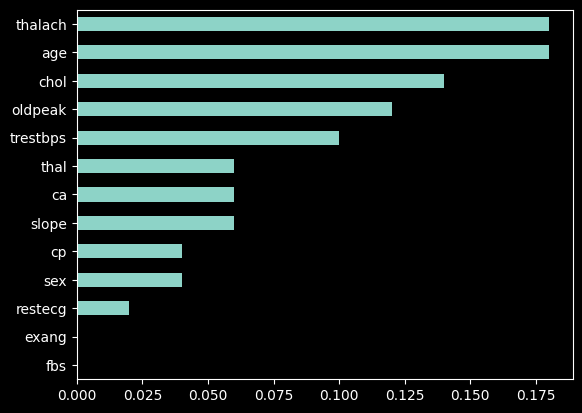

In [11]:
s1 = pd.Series(adb_clf.feature_importances_,index=x.columns)
s1.sort_values().plot(kind="barh")

Hyper parameter tuning

In [12]:
adb_clf = AdaBoostClassifier()
hyperparameters = {"n_estimators":np.arange(10,100),
                   "learning_rate":np.arange(0,2,0.001)}
rscv_ada_clf = RandomizedSearchCV(adb_clf,hyperparameters,cv=5)
rscv_ada_clf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': array([0.000e+00, 1.000e-03, 2.000e-03, ..., 1.997e+00, 1.998e+00,
       1.999e+00]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])})

In [13]:
rscv_ada_clf.best_estimator_

AdaBoostClassifier(learning_rate=0.254, n_estimators=22)

In [14]:
rscv_ada_clf.best_params_

{'n_estimators': 22, 'learning_rate': 0.254}

In [15]:
adb_clf = rscv_ada_clf.best_estimator_
adb_clf.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.254, n_estimators=22)

Testing data Evaluation

In [16]:
y_pred_test = adb_clf.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
clf_report=classification_report(y_test, y_pred_test)
print("Classification report :\n",clf_report)
print("*"*80)
accuarcy =accuracy_score(y_test, y_pred_test)
print("Accuracy: ",accuarcy)

Confusion Matrix :
 [[20  8]
 [ 5 28]]
********************************************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61

********************************************************************************
Accuracy:  0.7868852459016393


Training data evaluation

In [17]:
y_pred_train = adb_clf.predict(x_train)
cnf_matrix=confusion_matrix(y_train,y_pred_train)
print("Confusion matrix:\n",cnf_matrix)
print("*"*80)
clf_report=classification_report(y_train,y_pred_train)
print("Classification report:\n",clf_report)
print("*"*80)
accuarcy=accuracy_score(y_train,y_pred_train)
print("Accuracy: ",accuarcy)

Confusion matrix:
 [[ 88  22]
 [ 10 122]]
********************************************************************************
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.80      0.85       110
           1       0.85      0.92      0.88       132

    accuracy                           0.87       242
   macro avg       0.87      0.86      0.87       242
weighted avg       0.87      0.87      0.87       242

********************************************************************************
Accuracy:  0.8677685950413223
